# ML-8. Продвинутые методы машинного обучения

## Ансамблирование: бэггинг, случайный лес

Проверим на практике, что случайный лес улучшает предсказание случайного дерева. 

Для этого возьмём датасет по решению задачи на прогрессирование диабета. Мы будем предсказывать уровень прогрессирования болезни относительно базового уровня (некоторая численная мера, насколько «сильно» болен пациент диабетом). 

Качество будем измерять по среднему квадрату ошибки (MSE) на кросс-валидации с точностью до второго знака после запятой. 

In [149]:
#Загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Загружаем датасет из библиотеки
data = load_diabetes(as_frame=True)
#Создаем матрицу наблюдейний
X = data['frame'].drop('target', axis=1)
#Создаем вектор правильных ответов
y = data['target']

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: >

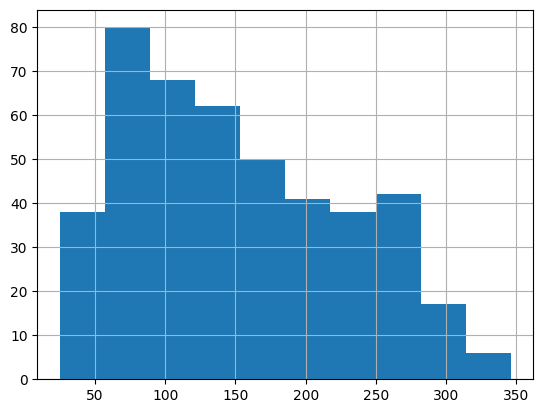

In [150]:
#Посмотрим на распределение целевого признака
y.hist()

In [151]:
#Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Посмотрим на размерности выборок
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'РАзмерность тестовой выборки {X_test.shape}')

#Создаем модель дерева решений с максимальной глубиной 10
regr1 = DecisionTreeRegressor(
    max_depth=10, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
#Обучаем модель 
regr1.fit(X_train, y_train)


#Создаем модель случайного леса из 10 деревьев с 
#максимальной глубиной 10 для каждого дерева
regr2 = RandomForestRegressor(
    max_depth=10, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
#Обучаем модель
regr2.fit(X_train, y_train)

#Формируем предсказания каждой из моделей
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)

#Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1), 2)}')
print(f'Качество предсказания по MSE для случайного леса {round(mean_squared_error(y_test, y_pred2), 2)}')

Размерность обучающей выборки (296, 10)
РАзмерность тестовой выборки (146, 10)
Качество предсказания по MSE для решающего дерева 6132.51
Качество предсказания по MSE для случайного леса 3533.73


### Задание 2.6

In [152]:
#Создаем модель дерева решений с максимальной глубиной 2
regr2_6_1 = DecisionTreeRegressor(
    max_depth=2, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
#Обучаем модель 
regr2_6_1.fit(X_train, y_train)


#Создаем модель случайного леса из 10 деревьев с 
#максимальной глубиной 2 для каждого дерева
regr2_6_2 = RandomForestRegressor(
    max_depth=2, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
#Обучаем модель
regr2_6_2.fit(X_train, y_train)

#Формируем предсказания каждой из моделей
y_pred1 = regr2_6_1.predict(X_test)
y_pred2 = regr2_6_2.predict(X_test)

#Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1), 2)}')
print(f'Качество предсказания по MSE для случайного леса {round(mean_squared_error(y_test, y_pred2), 2)}')

Качество предсказания по MSE для решающего дерева 3432.45
Качество предсказания по MSE для случайного леса 3203.77


### Задание 2.7

In [153]:
#Создаем модель дерева решений с максимальной глубиной 1000
regr2_7_1 = DecisionTreeRegressor(
    max_depth=1000, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
#Обучаем модель 
regr2_7_1.fit(X_train, y_train)


#Создаем модель случайного леса из 10 деревьев с 
#максимальной глубиной 1000 для каждого дерева
regr2_7_2 = RandomForestRegressor(
    max_depth=1000, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
#Обучаем модель
regr2_7_2.fit(X_train, y_train)

#Формируем предсказания каждой из моделей
y_pred1 = regr2_7_1.predict(X_test)
y_pred2 = regr2_7_2.predict(X_test)

#Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1), 2)}')
print(f'Качество предсказания по MSE для случайного леса {round(mean_squared_error(y_test, y_pred2), 2)}')

Качество предсказания по MSE для решающего дерева 6430.63
Качество предсказания по MSE для случайного леса 3549.09


## Ансамблирование: блендинг и стекинг

### Стекинг в sklearn

In [154]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

In [155]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt', DecisionTreeRegressor(random_state=42))
]

Теперь, когда список из базовых моделей готов, создадим объект класса StackingRegressor. Первым аргументом передаём список из базовых моделей. Будем использовать в качестве метамодели модель случайного леса. Для этого передаём её в параметр final_estimator. Остальные параметры оставим по умолчанию.

Обучаем модель с помощью метода fit(), делаем предсказание классов с помощью метода predict(), а затем считаем метрики.

In [156]:
#Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators, #базовые модели в стекинге
    final_estimator=RandomForestRegressor( #метамодель
        n_estimators=10, #количество деревьев в ансамбле
        random_state=42 #датчик генератора случайных чисел
    )
)
#Обучаем модель
reg.fit(X_train, y_train)

,estimators,"[('lr', ...), ('dt', ...)]"
,final_estimator,RandomForestR...ndom_state=42)
,cv,None
,n_jobs,None
,passthrough,False
,verbose,0
,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,None
,gcv_mode,None


In [157]:
#Формируем предсказание для тестовой выборки
y_pred_stack = reg.predict(X_test)
#Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack), 2)}')

Качество предсказания по MSE для стекинга 3467.74


Посмотреть на метапризнаки можно с помощью метода transform(). Для этого в метод нужно передать матрицу наблюдений X. В результате вызова метода для всех объектов каждая из двух моделей сделает предсказание вероятностей и вернёт матрицу из двух столбцов. Оформим её в виде DataFrame.

In [158]:
#Получаем мета-признаки из тренировочных данных
meta_data = reg.transform(X_train)
#Создаем DataFrame
meta_df = pd.DataFrame(
    meta_data, #содержимое таблицы
    columns=['meta_feature1', 'meta_feature2'] #название столбцов
)
meta_df.head()

,meta_feature1,meta_feature2
0,152.477333,154.0
1,202.022338,192.0
2,133.718464,116.0
3,146.698345,81.0
4,169.783292,122.0


### Задание 3.5

In [159]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('rr', RidgeCV()),
    ('lr', LinearRegression())
]

In [160]:
#Создаем объект класса стекинг
reg_3_5 = StackingRegressor(
    estimators=estimators, #базове модели в стекинге
    final_estimator=RandomForestRegressor( #метамодель
        n_estimators=100, #количество деревьев в ансамбле
        max_depth=10, #максимальная глубина дерева
        random_state=42 #датчик генератора случайных чисел
    )
)
#Обучаем модель

reg_3_5.fit(X_train, y_train)

,estimators,"[('rr', ...), ('lr', ...)]"
,final_estimator,RandomForestR...ndom_state=42)
,cv,None
,n_jobs,None
,passthrough,False
,verbose,0
,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,None
,gcv_mode,None


In [161]:
#Формируем предсказание для тестовой выборки
y_pred_stack = reg_3_5.predict(X_test)
#Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack), 1)}')

Качество предсказания по MSE для стекинга 3534.7


## Ансамблирование: бустинг

### Адаптивный бустинг в SKLEARN

In [162]:
from sklearn.ensemble import AdaBoostRegressor

#Создаем объект класса дерева решений
dt = DecisionTreeRegressor(
    max_depth=3, #максимальная глубина дерева
    random_state=42 #дачик генератора случайных чисел
)

#Создаем объект класса AdaBoost
ada = AdaBoostRegressor(
    estimator=dt, #базовая модель
    random_state=42, #датчик генератора случайных чисел
    n_estimators=10 #количество моделей в ансамбле
)

#Обучаем модель
ada.fit(X_train, y_train)

#Формируем предсказание для тестовой выборки
ada_pred = ada.predict(X_test)

#Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred), 2)}')

Качество предсказания по MSE для AdaBoost 3040.83


### Задание 4.1

Измените количество базовых моделей до 50 и 100. В качестве ответа приведите полученные результаты, округленные до второго знака после запятой. Остальные параметры оставьте неизменными.

In [163]:
#Качество модели по MSE для 50 базовых моделей

#Создаем объект класса AdaBoost
ada_4_1_1 = AdaBoostRegressor(
    estimator=dt, #базовая модель
    random_state=42, #датчик генератора случайных чисел
    n_estimators=50 #количество моделей в ансамбле
)

#Обучаем модель
ada_4_1_1.fit(X_train, y_train)

#Формируем предсказание для тестовой выборки
ada_pred = ada_4_1_1.predict(X_test)

#Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred), 2)}')

Качество предсказания по MSE для AdaBoost 2991.76


In [164]:
#Качество модели по MSE для 100 базовых моделей

#Создаем объект класса AdaBoost
ada_4_1_2 = AdaBoostRegressor(
    estimator=dt, #базовая модель
    random_state=42, #датчик генератора случайных чисел
    n_estimators=100 #количество моделей в ансамбле
)

#Обучаем модель
ada_4_1_2.fit(X_train, y_train)

#Формируем предсказание для тестовой выборки
ada_pred = ada_4_1_2.predict(X_test)

#Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred), 2)}')

Качество предсказания по MSE для AdaBoost 3101.68


### Градиентный бустинг в SKLEARN

In [165]:
from sklearn.ensemble import GradientBoostingRegressor

#Создаем объект класса градиентный бустинг
gb = GradientBoostingRegressor(
    max_depth=3, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)

#Обучаем модель
gb.fit(X_train, y_train)

#Формируем предсказание для тестовой выборки
gb_pred = gb.predict(X_test)

#Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для GraditntBoostingRegressor {round(mean_squared_error(y_test, gb_pred),2)}')

Качество предсказания по MSE для GraditntBoostingRegressor 3477.3


### Задание 4.5
Измените количество базовых моделей с 10 до 50 и 100. В качестве ответа приведите полученные результаты, округленные до второго знака после запятой. Если второе число после запятой равно нулю, округлите до одного знака: например 10.10 необходимо округлить до 10.1. Остальные параметры оставьте неизменными.

In [166]:
#Качество модели по MSE для 50 базовых моделей

#Создаем объект класса градиентный бустинг
gb_4_5_1 = GradientBoostingRegressor(
    max_depth=3, #максимальная глубина дерева
    n_estimators=50, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)

#Обучаем модель
gb_4_5_1.fit(X_train, y_train)

#Формируем предсказание для тестовой выборки
gb_pred = gb_4_5_1.predict(X_test)

#Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для GraditntBoostingRegressor {round(mean_squared_error(y_test, gb_pred),2)}')

Качество предсказания по MSE для GraditntBoostingRegressor 3100.08


In [167]:
#Качество модели по MSE для 100 базовых моделей

#Создаем объект класса градиентный бустинг
gb_4_5_2 = GradientBoostingRegressor(
    max_depth=3, #максимальная глубина дерева
    n_estimators=100, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)

#Обучаем модель
gb_4_5_2.fit(X_train, y_train)

#Формируем предсказание для тестовой выборки
gb_pred = gb_4_5_2.predict(X_test)

#Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для GraditntBoostingRegressor {round(mean_squared_error(y_test, gb_pred),2)}')

Качество предсказания по MSE для GraditntBoostingRegressor 3286.02


Попробуем решить задачу бинарной классификации с помощью градиентного бустинга. Для этого возьмём датасет качества вина. В качестве целевой метки будем считать качественным вино, рейтинг которого больше пяти.

In [168]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

In [169]:
#Загрузим данные
df = pd.read_csv('data/winequality-red.csv', sep=';')
display(df.head(5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Как и договаривались ранее, хорошим вином будем считать все, имеющие значение признака quality больше 5

In [170]:
#Создаем матрицу наблюдений
X = df.drop(['quality'], axis = 1)
#Создаем вектор признаков для бинарной классификации
y = (df['quality'] > 5).astype(int)

In [171]:
#Разделим выборку на тренировочную и тестовую 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Посмотрим на размерниксти выборок
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')

Размерность обучающей выборки (1071, 11)
Размерность тестовой выборки (528, 11)


In [172]:
#Инициализируем модель градиентного бустинга
gb =GradientBoostingClassifier(
    loss='log_loss', #функция потерь
    learning_rate=0.1, #темп обучения
    n_estimators=100, #число деревьев
    max_depth=3, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)

#Обучим модель
gb.fit(X_train, y_train)

#Формируем предсказание для тестовой выборки
y_pred = gb.predict(X_test)

#Посмотрим на основные метрики классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       238
           1       0.81      0.80      0.81       290

    accuracy                           0.79       528
   macro avg       0.79      0.79      0.79       528
weighted avg       0.79      0.79      0.79       528



Аналогично другим классификаторам в sklearn мы можем получать оценки вероятностей для каждого класса с помощью метода predict_proba(). Можете использовать эту возможность, например, для подбора оптимального порога вероятности, как мы делали это в предыдущих модулях.

In [173]:
#Прогнозируем вероятности принадлежности к классам
y_pred_proba = gb.predict_proba(X_test)
print(y_pred_proba)

[[0.7575177  0.2424823 ]
 [0.81931477 0.18068523]
 [0.80325657 0.19674343]
 ...
 [0.0212709  0.9787291 ]
 [0.90355559 0.09644441]
 [0.80946194 0.19053806]]


### Задание 4.6
Обучите на тренировочной выборке (X_train, y_train) модель градиентного бустинга, состоящего из 200 деревьев, максимальная глубина каждого из которых равна 3. Минимальное число объектов в листе — 10. Темп обучения возьмите равный 0.01. Параметр random_state установите в значение 42.


Сделайте предсказание качества вина для тренировочного и тестового набора данных. Рассчитайте метрику accuracy для тестового набора (X_test, y_test) и запишите её в качестве ответа с точностью до двух знаков после запятой.

In [174]:
#Инициализируем модель градиентного бустинга
gb =GradientBoostingClassifier(
    loss='log_loss', #функция потерь
    learning_rate=0.01, #темп обучения
    n_estimators=200, #число деревьев
    max_depth=3, #максимальная глубина дерева
    min_samples_leaf=10, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел
)

#Обучим модель
gb.fit(X_train, y_train)

#Формируем предсказание для тестовой выборки
y_pred = gb.predict(X_test)

#Посмотрим на основные метрики классификации
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.73


### Задание 4.7
Увеличьте количество деревьев до 500, остальные параметры оставьте прежними.


Сделайте предсказание качества вина для тренировочного и тестового набора данных. Рассчитайте метрику accuracy для тестового набора (X_test, y_test) и запишите её в качестве ответа с точностью до двух знаков после запятой.

In [175]:
#Инициализируем модель градиентного бустинга
gb =GradientBoostingClassifier(
    loss='log_loss', #функция потерь
    learning_rate=0.01, #темп обучения
    n_estimators=500, #число деревьев
    max_depth=3, #максимальная глубина дерева
    min_samples_leaf=10, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел
)

#Обучим модель
gb.fit(X_train, y_train)

#Формируем предсказание для тестовой выборки
y_pred = gb.predict(X_test)

#Посмотрим на основные метрики классификации
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.75


### Задание 4.8

Увеличьте learning rate до 0.2.


Сделайте предсказание качества вина для тренировочного и тестового набора данных. Рассчитайте метрику accuracy для тестового набора (X_test, y_test) и запишите её в качестве ответа с точностью до двух знаков после запятой.

In [176]:
#Инициализируем модель градиентного бустинга
gb =GradientBoostingClassifier(
    loss='log_loss', #функция потерь
    learning_rate=0.2, #темп обучения
    n_estimators=500, #число деревьев
    max_depth=3, #максимальная глубина дерева
    min_samples_leaf=10, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел
)

#Обучим модель
gb.fit(X_train, y_train)

#Формируем предсказание для тестовой выборки
y_pred = gb.predict(X_test)

#Посмотрим на основные метрики классификации
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.80


## Пайплайны

Загрузим датасет и посмотри на него

In [177]:
#Загружаем необходимые библиотеки
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#Загрузим и посмотрим DataFrame

data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.loc[:, 'target'] = data['target']
display(df.head(5))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Определимся с метрикой, по которой будем оценивать качество модели — Root Mean Squared Error (RMSE), корень из среднего квадрата отклонения. Для этого на метод mean_squared_error подадим атрибут squared = False, который позволяет управлять возведением метрики в квадрат. Помимо RMSE для оценки качества модели будем использовать метрику R2.

In [200]:
def rmse(y_hat, y):
    return np.sqrt(mean_squared_error(y_hat, y))

Посмотрим на типы данных с помощью метода df.info()

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Видим, что данные исключительно типа float, поэтому мы можем в качестве предобработки применить к ним StandardScaler().

Разделим данные на обучающую и тестовую выборки, используя train_test_split: 

In [185]:
X=df.drop('target', axis=1)
y=df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(f'Размер обучающей выборки {X_train.shape}')
print(f'Размер тестовой выборки {X_test.shape}')

Размер обучающей выборки (15480, 8)
Размер тестовой выборки (5160, 8)


Обучим простейший пайплайн, вызвав метод fit(), состоящий из случайного леса и стандартизации (StandardScaler). На вход пайплайна подается список из преобразований в формате кортежа (название метода преобразования, по которому мы будем обращаться в дальнейшем к нашему преобразованию, объект  метода преобразования).

In [186]:
pipeline  = Pipeline([('scaler', StandardScaler()),
                      ('rf', RandomForestRegressor())])
pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


Посмотрим на метрики. Для этого сделаем предсказание пайплайном с помощью метода predict() и посчитаем R2 и RMSE с помощью функций r2_score() и rmse() соответственно. Округлим результат до четырёх цифр после запятой

In [201]:
y_pred = pipeline.predict(X_test)
print(f'Качество по метрике r2_score: {round(r2_score(y_test, y_pred),4)}')
print(f'Качество по RSME: {round(rmse(y_test, y_pred),4)}')

Качество по метрике r2_score: 0.8068
Качество по RSME: 0.5056


Теперь мы можем посмотреть на все параметры в пайплайне, вызвав метод get_params()

In [202]:
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('rf', RandomForestRegressor())],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'rf': RandomForestRegressor(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__criterion': 'squared_error',
 'rf__max_depth': None,
 'rf__max_features': 1.0,
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__monotonic_cst': None,
 'rf__n_estimators': 100,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm_start': False}

Примечание. В качестве альтернативного метода задания пайплайна можно использовать метод make_pipeline, на вход которого подаются объекты, которые будут использованы в пайплайне. В нашем случае:
```
from sklearn.pipeline import make_pipeline
make_pipeline(StandardScaler(), RandomForestRegressor())
```
Использование пайплайна в виде, полученном из make_pipeline, аналогично. 

Попробуем теперь обратиться к отдельной части пайплайна. Попробуем вызвать значение n_estimator у случайного леса. Мы можем это сделать двумя способами: индексацией пайплайна или обращением через имя, которые мы задали ранее при создании ('rf').

In [203]:
print(pipeline[1].n_estimators)
print(pipeline['rf'].n_estimators)

100
100


Теперь попробуем задать этому же параметру значение 200. Можно это сделать, используя метод set_params(), на вход которого надо подавать конструкцию <название модуля>__<название параметра>.

Обратите внимание на два нижних подчеркивания, которые используются в качестве литералов для разбиения названия модуля и названия его параметра. Без него компилятор будет неправильно интерпретировать параметр, который вы хотите изменить!

In [204]:
pipeline.set_params(rf__n_estimators=200)

,steps,"[('scaler', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


Данную структуру надо учитывать, когда для пайплайна задается GridSearch кросс-валидация. Попробуем взять 100, 200, 500 базовых моделей и сделать поиск оптимального параметра StardardScaler with_mean (типа bool, который отвечает за центровку данных, приводит распределение к нулевому среднему, по умолчанию — True. В противном случае среднее данных остается неизменным)

In [205]:
from sklearn.model_selection import GridSearchCV
param_grid = {'scaler__with_mean': [True, False],
              'rf__n_estimators': [100, 200, 500]}
grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=True)

grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(n_estimators=500))])


In [206]:
y_pred = grid_search.best_estimator_.predict(X_test)
print(f'Качество по метрике r2_score: {round(r2_score(y_test, y_pred),4)}')
print(f'Качество по RSME: {round(rmse(y_test, y_pred),4)}')

Качество по метрике r2_score: 0.81
Качество по RSME: 0.5014


### Предобработка в пайплайнах

При использовании пайплайна для сборки обработки данных в один стек удобно воспользоваться Column Transformer.

Column Transformer — это специальный объект из модуля compose библиотеки sklearn, который позволяет применять набор трансформаций к данным. Этот объект позволяет преобразовывать разные столбцы или подмножества столбцов входных данных по отдельности, а результаты, сгенерированные каждым преобразователем, будут объединены в единую таблицу.

Однако, самим Column Transformer пользоваться не совсем удобно, для более удобной работы с ним мы будем использовать «обёртку» в виде функции make_column_transformer() из того же модуля библиотеки sklearn.

Для начала загрузим данные и посмотрим данные

In [207]:
df_wine = pd.read_csv('data/Red.csv')
df_wine.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [208]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB


Например, у нас есть численный признак цена вина (Price) и категориальный регион производства (Region). Для первого надо применить StandardScaler(), для второго — OneHotEncoder(). Мы можем сделать это следующим образом

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (StandardScaler(), ['Price']),
    (OneHotEncoder(), ['Country'])
)

print(ct)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(), ['Price']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['Country'])])


Примечание. Если мы хотим применить, например, OneHotEncoder, к более чем одному признаку, то просто достаточно добавить в список колонки, например ['Country', ‘Region’]. Теперь OneHotEncoder будет работать не только на признаке Country, но ещё и на Region.

Примечание. Можно также использовать фильтрацию по типу колонок, используя метод make_column_selector() из sklearn.compose. Например, следующий Column Transformer будет применять преобразование StandardScaler к числовым столбцам и OneHotEncoder к столбцам с типом данных object:

```
from sklearn.compose import make_column_selector
import numpy as np

ct_filtered = make_column_transformer(
       (StandardScaler(), make_column_selector(dtype_include=np.number)),
       (OneHotEncoder(), make_column_selector(dtype_include=object))
)

print(ct_filtered)
```

Полученный трансформер можно использовать в качестве элемента пайплайна, например: 

In [210]:
pipeline = Pipeline([('ct', ct), ('rf', RandomForestRegressor())])

Давайте посмотрим на результат работы ColumnTransformer в пайплайне. Для этого обучим его на колонках Price и Country, а в качестве целевой метки используем рейтинг вина Rating.

In [211]:
X= df_wine[['Country', 'Price']]
y = df_wine['Rating']
pipeline.fit(X,y)

,steps,"[('ct', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standardscaler', ...), ('onehotencoder', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Примечание. В рамках этого примера мы обучаем пайплайн на полной выборке. Применяя эти знания на практике, не забудьте предварительно разделить данные на тренировочную и тестовую выборки, как мы делали это в первой части юнита. Во избежание утечки данных обучайте пайплайн на тренировочной выборке.

Теперь вызовем отдельно ct и преобразуем X. 

Важный момент: при отображении после преобразования ваш датасет будет представлен в виде sparse-матрицы (специальный формат для хранения больших, практически полностью нулевых матриц), поэтому надо будет вызвать метод toarray(). Так же мы можем получить названия колонок с onehotencoder с помощью метода .get_feature_names_out(), обратившись именно к энкодеру. 

In [212]:
pd.DataFrame(
    pipeline['ct'].transform(X).toarray(),
    columns=['Price'] + pipeline['ct'].transformers_[1][1].get_feature_names_out().tolist()
)

,Price,Country_Argentina,Country_Australia,Country_Austria,Country_Brazil,Country_Bulgaria,Country_Canada,Country_Chile,Country_China,Country_Croatia,...,Country_Portugal,Country_Romania,Country_Slovakia,Country_Slovenia,Country_South Africa,Country_Spain,Country_Switzerland,Country_Turkey,Country_United States,Country_Uruguay
0,0.657648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.278402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.373184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.358231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.117684,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,-0.266981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8662,-0.224358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8663,-0.178910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8664,-0.387784,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Обученный пайплайн можно сохранить в формат pickle, например, используя библиотеку joblib. Далее его можно использовать после десериализации как решение «из коробки», применяя следующие методы.

In [214]:
!pip install joblib
import joblib
joblib.dump(pipeline, 'pipeline.pkl')


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


['pipeline.pkl']

После этого ваш пайплайн будет сохранен в файл pipeline.pkl. Вы можете использовать свой пайплайн, импортировав все библиотеки из зависимостей (которые импортировались при создании пайплайна), используя следующие строчки кода

In [215]:
pipeline_loaded = joblib.load('pipeline.pkl')
print(pipeline_loaded)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(), ['Price']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Country'])])),
                ('rf', RandomForestRegressor())])


## Пайплайны. Практика

### Задание 6.1

На основании датасета предсказания рейтинга красного вина, с которым вы работали в разделе о предобработке данных в предыдущем юните (файл Red.csv ), вам предстоит выполнить следующее:

Добавить в пайплайн, созданный вами в предыдущем юните, обработку столбца 'Region'. Кодирование 'Region' произвести с использованием OrdinalEncoder. Стандартизацию столбца 'Price' и кодирование столбца 'Country' осуществить в соответствии с примером, представленным в юните 5.

Важно! Для совпадения результатов процесс трансформации столбцов должен выполняться в следующей последовательности:
* Кодирование столбца 'Region' через OrdinalEncoder.
* Стандартизация столбца 'Price'.
* Кодирование столбца 'Country' через OneHotEncoder.

Обучить пайплайн на тренировочном наборе данных (файл Red.csv ) и оценить качество модели по метрике RMSE на тестовом наборе (файл Red_test.csv ).

Зафиксировать random_state=42.

Сохранить пайплайн в файл pipeline_wine.pkl.

В качестве ответа на задание введите в поле ниже полученный результат по метрике RMSE, округленный до четвёртого знака после запятой.

In [278]:
from sklearn.preprocessing import OrdinalEncoder

#Кодирование и стандартизация
ct = make_column_transformer(
    (OrdinalEncoder(), ['Region']),
    (StandardScaler(), ['Price']),
    (OneHotEncoder(), ['Country'])
)

#Пайплайн
pipeline = Pipeline([('ct', ct), ('rf', RandomForestRegressor(random_state=42))])

#Тренировочные данные
X = df_wine[['Country', 'Price', 'Region']]
y = df_wine['Rating']

#Тестовые даныне 
df_test = pd.read_csv('data/Red_test.csv')

X_test = df_test[['Country', 'Price', 'Region']]
y_test = df_test['Rating']

#Обучение пайплайна
pipeline.fit(X, y)

#Предсказание
y_pred = pipeline.predict(X_test)

#Вывод метрики RMSE
print(f'Качество по RSME: {round(rmse(y_test, y_pred),4)}')

#Сохраниение пайплайна
joblib.dump(pipeline, 'pipeline_wine.pkl')

Качество по RSME: 0.0765


['pipeline_wine.pkl']

### Задание 6.2

Теперь попробуем изменить параметры случайного леса в пайплайне, полученном в предыдущем задании.

Измените параметр n_estimators в случайном лесу со значения по умолчанию до 200 , используя метод set_params.

В качестве ответа на задание введите в поле ниже полученный результат по метрике RMSE, округленный до четвёртого знака после запятой.

In [279]:
#Изменение параметров пайплайна
pipeline.set_params(rf__n_estimators=200)

#Обучение пайплайна
pipeline.fit(X, y)

#Предсказание 
y_pred = pipeline.predict(X_test)

#Вывод метрики RMSE
print(f'Качество по RSME: {round(rmse(y_test, y_pred),4)}')

Качество по RSME: 0.0761


### Задание 6.3

Теперь попробуем добавить стекинг в качестве модели в пайплайн.

Вам следует выполнить следующее:

Собрать StackingRegressor:
* В качестве базовых моделей возьмите ридж-регрессию RidgeCV() и решающее дерево.
* В качестве метамодели возьмите случайный лес с настройками (количество базовых моделей 10).
* Все базовые модели стекинга модели должны быть с настройками по умолчанию (кроме random_state).
* Зафиксировать random_state=42 (для всех моделей).
* Заменить в пайплайне задачи 6.1 случайный лес на StackingRegressor.
* Обучить модель на тренировочной выборке.

В качестве ответа на задание введите в поле ниже полученный результат по метрике RMSE, округлённый до второго знака после запятой.

In [280]:
#Загружаем необходимые библиотеки
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

In [283]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt', DecisionTreeRegressor(random_state=42))
]

#Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators, #базовые модели в стекинге
    final_estimator=RandomForestRegressor( #метамодель
        n_estimators=10, #количество деревьев в ансамбле
        random_state=42 #датчик генератора случайных чисел
    )
)

pipeline = Pipeline([('ct', ct), ('stack', reg)])

pipeline.fit(X, y)

y_pred = pipeline.predict(X_test)

#Вывод метрики RMSE
print(f'Качество по RSME: {round(rmse(y_test, y_pred),2)}')

Качество по RSME: 0.18


## Metric Learning